# Individual Project Planning - Prima Cheung


# 1. Data Description
**players.csv:**

experience: shows the level of experience each player has, a character variable

subscribe: shows whether each player is subscribed or not, a logical variable

hashed email: shows the email used to login by each player, a character variable

played hours: shows the total number of hours each player spent on the game, a double type variable

name: shows the login name of each player, a character variable

gender: shows the gender of each player, a character variable

age: shows the age of each player, an integer variable

**sessions.csv:**

hashed email: shows the email used to login for the recorded session, a character variable

start time: shows the start time with the date for each recorded sesssion, a character variable

end time: shows the end time with the date for each recorded sesssion, a character variable

original start time: shows the start time in seconds in Unix, aa double type variable

original end time: shows the end time in seconds in Unix, aa double type variable

# 2. Questions
**Broad question:** 
We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

**Specific question:**
How does gender and age group affect the amount of time and time of the day that each player spends on the game?

The question can be approached by calculating the cumulative amount of time each gender and age group spend on the game. The time stamps of which these gender groups are playing can be determined by the sessions file. The data can then be made into a classification model with gender and age being the predictors, and played hours and played times being the outcome. The created classifier can then be put into test using a set of testing data, which can help us analyze which kinds of players are more likely to contribute larger amounts of data.

# 3. Exploratory data analysis and visualization

In [68]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [69]:
url_players <- "https://docs.google.com/spreadsheets/d/1EYjBD4x0EuHiLV0bNigm_rP2CE_AWIp0xkckYZk-ODY/export?format=csv"
url_sessions <- "https://docs.google.com/spreadsheets/d/1qgtp8znii_KdIJATo1sZxr_udQENdvRrwLMwehhsPy8/export?format=csv"

players <- read_csv(url_players)
sessions <- read_csv(url_sessions)

players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.72e+12,1.72e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72e+12,1.72e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72e+12,1.72e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.72e+12,1.72e+12


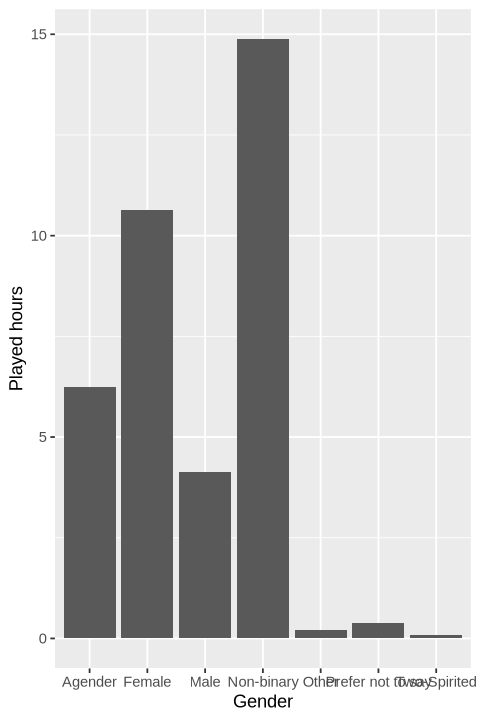

In [70]:
players_gen <- players |>
    select(gender, played_hours)|>
    group_by(gender)|>
    summarize(played_hours = mean(played_hours))

players_gen_plot <- ggplot(players_gen, aes(x = gender, y = played_hours)) +
    geom_bar(stat = "identity") +
    xlab("Gender") + 
    ylab("Played hours")
players_gen_plot


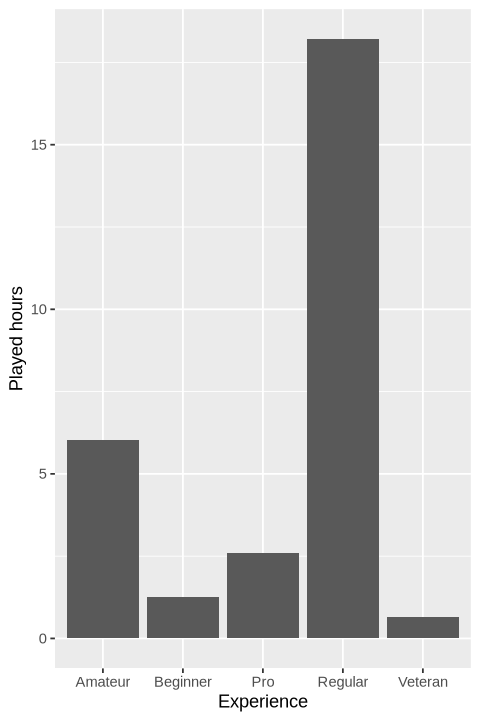

In [71]:
players_exp <- players |>
    select(experience, played_hours)|>
    group_by(experience)|>
    summarize(played_hours = mean(played_hours))

players_exp_plot <- ggplot(players_exp, aes(x = experience, y = played_hours)) +
    geom_bar(stat = "identity") +
    xlab("Experience") + 
    ylab("Played hours")
players_exp_plot


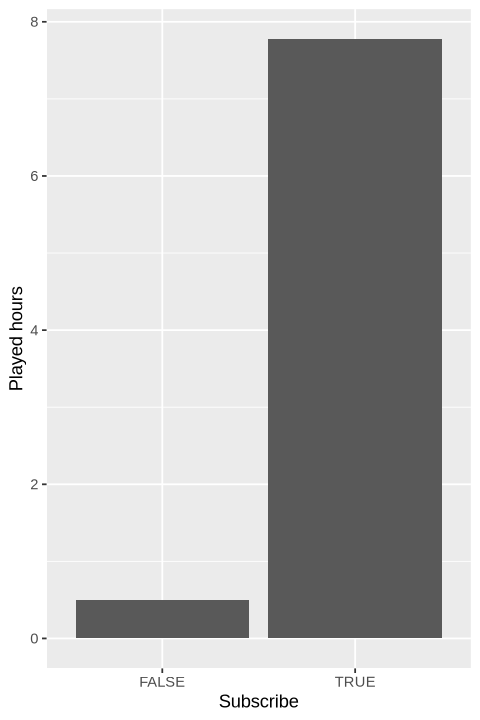

In [72]:

options(repr.plot.width = 4, repr.plot.height = 6) 

players_sub <- players |>
    select(subscribe, played_hours)|>
    group_by(subscribe)|>
    summarize(played_hours = mean(played_hours))

players_sub_plot <- ggplot(players_sub, aes(x = subscribe, y = played_hours)) +
    geom_bar(stat = "identity") +
    xlab("Subscribe") + 
    ylab("Played hours")
players_sub_plot


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


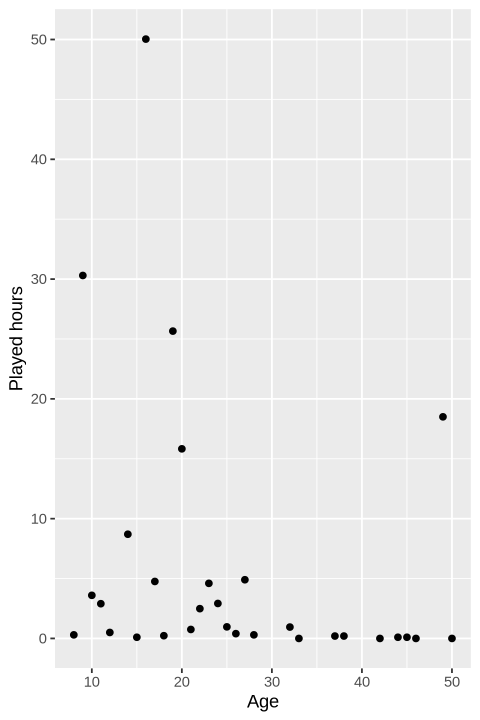

In [73]:
options(repr.plot.width = 4, repr.plot.height = 6) 

players_age <- players |>
    select(Age, played_hours)|>
    group_by(Age)|>
    summarize(played_hours = mean(played_hours))

players_age_plot <- ggplot(players_age, aes(x = Age, y = played_hours)) +
    geom_point()+
    xlab("Age") + 
    ylab("Played hours")
players_age_plot


In [75]:
sessions <- sessions |>
    group_by(hashedEmail)
    summarize
sessions

function (.data, ..., .by = NULL, .groups = NULL) 
{
    by <- enquo(.by)
    if (!quo_is_null(by) && !is.null(.groups)) {
        abort("Can't supply both `.by` and `.groups`.")
    }
    UseMethod("summarise")
}
<bytecode: 0x55d80c9a3140>
<environment: namespace:dplyr>

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.72e+12,1.72e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72e+12,1.72e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72e+12,1.72e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.72e+12,1.72e+12


**Plot Analysis**

Both provided datasets are able to be opened. The created plots show how each possible predictive variable correlates with the amount of time spent on the game. Data from the sessions file can be used to analyze at which time each player is on the game. The gender and age of these players can be found using the recorded hashed emails. 

In the created plots, it is evident that non-binary people averaged to spend the most amount of time on the game. When comparing experience levels, individuals who are said to have "regular" experience seem to play the most hours. With regards to whether the players are subscribed, subscribed players averaged to spend more time on the game. Lastly, based on the last created plot, the age group of 10-20 seem to be spending the most amount of time on the game. 

Based on the created plots, it can be concluded that non-binary people and people from ages 10-20 spend the most time on the game. However, to perform any further investigation, it is important to scale both of these predictors and see how the data correlates.

It is important to note that the information recieved is provided voluntarily by each recorded player, therefore, it is impossible to know the accuracy of the used data tables. 


# 4. Methods and Plan

The main method that will be used for this investigation is classification. To apply this method, it needs to be assumbed that the provided data is 100% accurate. This method can be limiting as some data about each individual is not shared, this prevents the rest of their recorded data to be used on the classification model, which can affect the accruacy and effectiveness of the model. The data will be split into training and testing sets with a 60/40 split to verify its accuracy and precision.  
